In [60]:
# Load Iris Dataset
import numpy as np
from sklearn import datasets
# Model
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [69]:
# Load Dataset with first 2 Features
iris = datasets.load_iris()
x = iris.data[:, 0:2] # Features
y = iris.target

# Dataset variables
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = 3
test_size = 20
train_size = num_samples - test_size

# Split Data in Train and Testset
indices = np.random.permutation(num_samples)
x_train = x[indices[:-20]]
y_train = y[indices[:-20]]

x_test = x[indices[-20:]]
y_test = y[indices[-20:]]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [62]:
# Training Size
print(x_train.shape)
print(y_train.shape)

# Testing Size
print(x_test.shape)
print(y_test.shape)

(130, 2)
(130,)
(20, 2)
(20,)


In [63]:
neighbors = [i for i in range(1, 11)] # [1, 2, ..., 10]
weights = ["uniform", "distance"]

# 10 x 2 = 20 Modelle
for neighbor in neighbors:
    for weight in weights:
        knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
        knn.fit(x_train, y_train)
        score = knn.score(x_test, y_test)
        print("Score for setup: ", neighbor, "N, ", weight, "W - Score = ", score) # Score: Genauigkeit (Accuracy)

Score for setup:  1 N,  uniform W - Score =  0.75
Score for setup:  1 N,  distance W - Score =  0.75
Score for setup:  2 N,  uniform W - Score =  0.75
Score for setup:  2 N,  distance W - Score =  0.75
Score for setup:  3 N,  uniform W - Score =  0.8
Score for setup:  3 N,  distance W - Score =  0.75
Score for setup:  4 N,  uniform W - Score =  0.65
Score for setup:  4 N,  distance W - Score =  0.75
Score for setup:  5 N,  uniform W - Score =  0.7
Score for setup:  5 N,  distance W - Score =  0.75
Score for setup:  6 N,  uniform W - Score =  0.7
Score for setup:  6 N,  distance W - Score =  0.75
Score for setup:  7 N,  uniform W - Score =  0.7
Score for setup:  7 N,  distance W - Score =  0.75
Score for setup:  8 N,  uniform W - Score =  0.7
Score for setup:  8 N,  distance W - Score =  0.75
Score for setup:  9 N,  uniform W - Score =  0.75
Score for setup:  9 N,  distance W - Score =  0.75
Score for setup:  10 N,  uniform W - Score =  0.75
Score for setup:  10 N,  distance W - Score =

In [64]:
# Use 'best Setup'
best_neighbor = 3
best_weight = "distance"

knn = KNeighborsClassifier(n_neighbors=best_neighbor, weights=best_weight)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)
pred_prob = knn.predict_proba(x_test)

print("Predictions vs. Classes:")
print("Pred: ", pred)
print("Class: ", y_test)
print("\nPrediction Probs:")
print(pred_prob)

Predictions vs. Classes:
Pred:  [0 2 2 1 0 1 0 0 0 2 1 1 1 0 1 2 0 0 0 2]
Class:  [0 1 2 1 0 2 0 0 0 2 1 2 2 0 2 2 0 0 0 2]

Prediction Probs:
[[1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.70710678 0.29289322]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.29289322 0.70710678]]


In [65]:
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])

def make_meshgrid(x, y):
    x = np.arange(x.min()-1, x.max()+1, 0.01) # 0, 0.05, 0.1, 0.15 ...., 2.0
    y = np.arange(y.min()-1, y.max()+1, 0.01) # 0, 0.05, 0.1, 0.15 ...., 2.0
    xx, yy = np.meshgrid(x, y)
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **params)

def plot_knn(x_train, y_train, x_test, y_test):
    colors = ["red", "blue", "green"]
    fig, ax = plt.subplots()
    x0 = x_train[:,0]
    x1 = x_train[:,1]
    xx, yy = make_meshgrid(x0, x1)
    plot_contours(ax, knn, xx, yy, cmap=cmap_light, alpha=0.3)
    for index, point in enumerate(x_train):
        plt.scatter(point[0], point[1], color=colors[y_train[index]], marker="o", s=20.0)
    for index, point in enumerate(x_test):
        plt.scatter(point[0], point[1], color=colors[y_test[index]], marker="*", s=20.0)
    


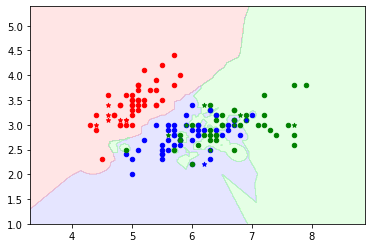

In [66]:
# Statement: *
plot_knn(x_train, y_train, x_test, y_test)